<H1 style ='color :b;background-color:AliceBlue;border-style: dotted; padding : 15px'> <ul>
    <li>(Ford GoBike System feb 2019 Explantory show)
    <li style='color: purple'>  by (Mohamad Ahmad Hassan) </li>


## Investigation Overview

<H1 style ='color :Navy;background-color:WhiteSmoke;border-style: dotted;border-color: magenta; padding :20px'>
    <ul>
    <li style='color: hotpink'> This presention will be used to try to find some insights which follow: </li>
    <ol>
        <li>To find the count of people using the share bike system
        <li>To find the Gender distrbution of users
        <li> How Much time diffrent users types spend using the bikes
        <li>Suggest that geneder equality could promote our service by showing that gender usage or duration of usage to the service
        </ol>
    </ul>   
       


## Dataset Overview

<H1 style ='color :Navy;background-color:WhiteSmoke;border-style: dotted;border-color: magenta; padding :20px'>
    <ul>
    <li style='color: hotpink'> This Dataset contain the following: </li>
    <ol>
        <li>Duration of trips in seconds and we changed that to minutes and hours for better understaning
        <li>Members birth years and we changed that to Age
        <li> User Type either Consumer or Subscriber 
        <li>Members genders
        </ol>
    </ul>   
       

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [24]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [25]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_month'] = df.start_time.dt.strftime('%b')
df['end_month'] = df.end_time.dt.strftime('%b')

In [26]:
df['member_birth_year'] = df['member_birth_year'].astype('Int64')

In [27]:
df['members_ages'] = 2021 - df['member_birth_year']

df['members_ages'] = df['members_ages'].fillna(int(df['members_ages'].mean()))

In [28]:
df['duration_min']=df['duration_sec']/60
df['duration_hr']=df['duration_min']/60

In [29]:
df_final = df.copy()
df_final.drop(['duration_sec','member_birth_year','start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [30]:
df_final.head(3)

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month,end_month,members_ages,duration_min,duration_hr
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,Feb,Mar,37,869.750000,14.495833
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,No,Feb,Mar,36,708.683333,11.811389
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,Feb,Mar,49,1030.900000,17.181667


## (Gender distribution )

<H2 style ='color :Navy;background-color:AliceBlue;border-style: ridge;
  border-color: DeepPink;padding: 20px'> This visual shows  us the distrbuation of genders using ford Gobike share system

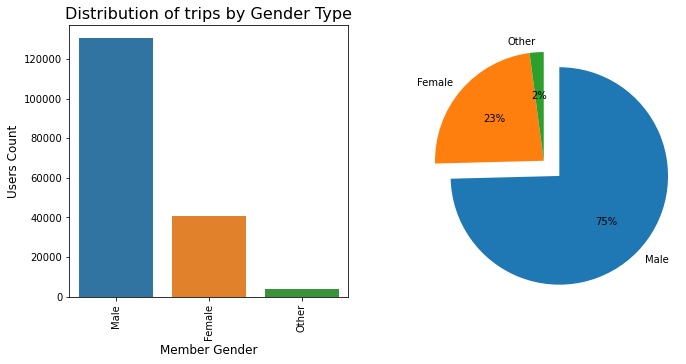

In [31]:
plt.figure(figsize=(11, 11))
plt.subplot(2, 2, 1) 

sb.countplot(data=df_final,x=df_final['member_gender'],order = ['Male', 'Female','Other']);
plt.xlabel('Member Gender', fontsize=12)
plt.ylabel('Users Count', fontsize=12)
plt.title("Distribution of trips by Gender Type", fontsize=16);
# get the current tick locations and labels

plt.xticks(rotation=90);

plt.subplot(2, 2, 2) 
sorted_genders = df_final['member_gender'].value_counts()
plt.pie(sorted_genders, labels = sorted_genders.index, startangle = 90, explode=[0.2, 0, 0], counterclock = False, autopct='%1.0f%%');
plt.show;



## (Age Of Riders )

<H2 style ='color :Navy;background-color:AliceBlue;border-style: ridge;
  border-color: DeepPink;padding: 20px'> This visual shows  us the distrbuation of Ages using ford Gobike share system

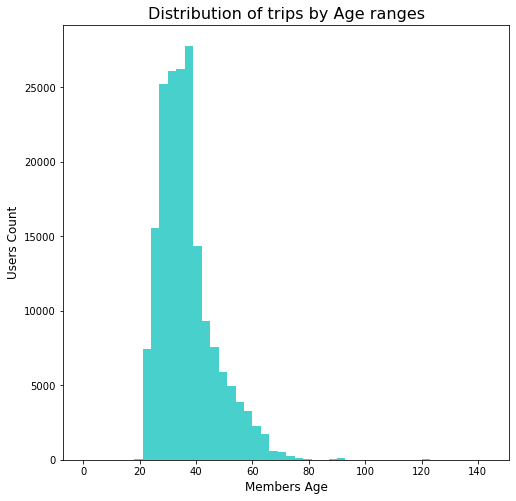

In [32]:
plt.figure(figsize=(8,8))
plt.xlabel('Members Age', fontsize=12)
plt.ylabel('Users Count', fontsize=12)
plt.title("Distribution of trips by Age ranges", fontsize=16);
bins = np.arange(0, df_final['members_ages'].max()+3, 3)
plt.hist(data = df_final, x = 'members_ages', bins = bins, color = 'MediumTurquoise');

## (The Distrbution of customers and subscribers trips duration)


<H2 style ='color :Navy;background-color:AliceBlue;border-style: ridge;
  border-color: DeepPink;padding: 20px'> This visual shows  us the distrbuation of User Types and duration spent using ford Gobike share system

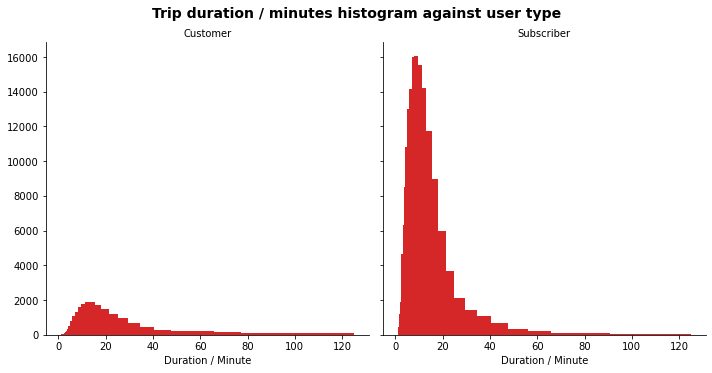

In [33]:
facet = sb.FacetGrid(df_final, col="user_type", margin_titles=True, height=5)
bins = 5**np.arange(0 , 3 + 0.1 , 0.1);
facet.map(plt.hist, "duration_min", color=sb.color_palette()[3], bins=bins)
facet.set_axis_labels("Duration / Minute")
facet.set_titles(col_template = '{col_name}')
facet.fig.suptitle('Trip duration / minutes histogram against user type', y=1.03, fontsize=14, fontweight='semibold');


## (Distribution of trips  Duration by Gender Type)

<H2 style ='color :Navy;background-color:AliceBlue;border-style: ridge; border-color:whitesmoke;
  border-color: DeepPink;padding: 20px'> This visual shows  us the distrbuation of Gender Type and duration spent using ford Gobike share system
     
   <ul>
        <li> In this plot we can see that both other gender and Females is having longer duration of trips than Males who are supposed to be physically more capable , we can use that point to promote our service to more female users </li>

<H2 style ='color :Navy;background-color:AliceBlue;border-style: ridge; border-color:whitesmoke;
  border-color: DeepPink;padding: 20px'> This visual shows  us the distrbuation of Gender Type and duration spent using ford Gobike share system
     
   <ul>
        <li>Females is 11.5 minutes while other is about 16.5 minutes while males are 10 minutes  </li>

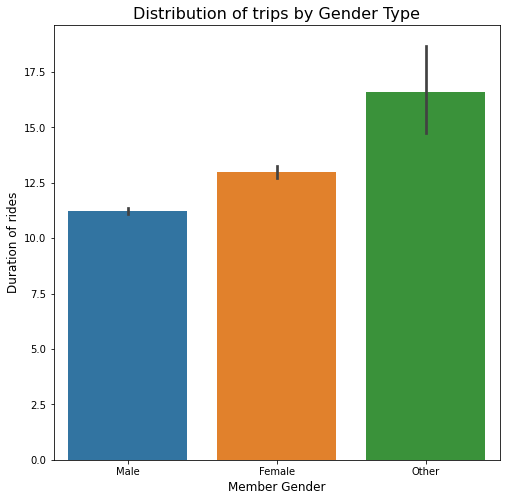

In [34]:
plt.figure(figsize=(8,8))
base_color = sb.color_palette()[3]
gender = ['Male', 'Female', 'Other']

genderclass = pd.api.types.CategoricalDtype(ordered=True, categories=gender)
df_final['member_gender'] = df_final['member_gender'].astype(genderclass);

sb.barplot(data=df_final, x='member_gender', y='duration_min');

plt.xlabel('Member Gender', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by Gender Type", fontsize=16);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

the below cell is wrong cell '!jupyter nbconvert slide_deck_explantory.ipynb --to slides -- post serve -- no-input--no-prompt"

In [35]:
!jupyter nbconvert slide_deck_explantory.ipynb --to slides -- post serve -- no-input--no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'post' matched no files
[NbConvertApp] WARNING | pattern 'serve' matched no files
[NbConvertApp] WARNING | pattern '--' matched no files
[NbConvertApp] WARNING | pattern 'no-input--no-prompt' matched no files
[NbConvertApp] Converting notebook slide_deck_explantory.ipynb to slides
[NbConvertApp] Writing 634545 bytes to slide_deck_explantory.slides.html


'!jupyter nbconvert slide_deck_explantory.ipynb --no-input --to slides --no-prompt' i got it from stackoverflow and worked perfectly 

In [38]:
!jupyter nbconvert slide_deck_explantory.ipynb --no-input --to slides --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_explantory.ipynb to slides
[NbConvertApp] Writing 652196 bytes to slide_deck_explantory.slides.html
